In [1]:
from transformers import BertForSequenceClassification, BertTokenizerFast
import torch
from transformers import AdamW, get_scheduler
from torch.utils.data import DataLoader
from src.dataset import TurtleSoupClassificationDataset
from src.utils import plot_training_validation_loss, plot_training_validation_acc
from run import train_classification_model

c:\Users\wei\Desktop\programs\deep learning\turtle-soup-lateral-thinking-game\model\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [3]:
model = BertForSequenceClassification.from_pretrained("bert-base-chinese", num_labels=3)
tokenizer = BertTokenizerFast.from_pretrained("bert-base-chinese")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
batch_size = 16
epochs = 10
learning_rate = 1e-5

template = "根據判定規則，此玩家的猜測為"
label_map = {
    "T": 0,
    "F": 1,
    "N": 2
}

In [5]:
train_data_path = "./data/zh_train_8k.json"
test_data_path = "./data/zh_test_1.5k.json"
prompt_path = "./prompts/prompt_zh.json"

In [6]:
train_dataset = TurtleSoupClassificationDataset(train_data_path, prompt_path, tokenizer, max_length=512, template=template, label_map=label_map)
test_dataset = TurtleSoupClassificationDataset(test_data_path, prompt_path, tokenizer, max_length=512, template=template, label_map=label_map)

# 創建 DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [7]:
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)
num_training_steps = len(train_dataloader) * epochs
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

c:\Users\wei\Desktop\programs\deep learning\turtle-soup-lateral-thinking-game\model\venv\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [8]:
train_losses, train_accuracies, val_losses, val_accuracies = train_classification_model(
    model, train_dataloader, val_dataloader, optimizer, lr_scheduler, epochs, device=device
)

Epoch 1/10: 100%|██████████| 499/499 [03:12<00:00,  2.59it/s]


Epoch 1/10 | train_loss: 0.791, val_loss: 1.169, train_acc: 0.611, val_acc: 0.578


Epoch 2/10: 100%|██████████| 499/499 [03:13<00:00,  2.59it/s]


Epoch 2/10 | train_loss: 0.501, val_loss: 1.399, train_acc: 0.794, val_acc: 0.568


Epoch 3/10: 100%|██████████| 499/499 [03:13<00:00,  2.58it/s]


Epoch 3/10 | train_loss: 0.239, val_loss: 1.809, train_acc: 0.915, val_acc: 0.546


Epoch 4/10: 100%|██████████| 499/499 [03:13<00:00,  2.58it/s]


Epoch 4/10 | train_loss: 0.110, val_loss: 1.952, train_acc: 0.967, val_acc: 0.551


Epoch 5/10: 100%|██████████| 499/499 [03:14<00:00,  2.56it/s]


Epoch 5/10 | train_loss: 0.062, val_loss: 2.202, train_acc: 0.981, val_acc: 0.568


Epoch 6/10: 100%|██████████| 499/499 [03:14<00:00,  2.56it/s]


Epoch 6/10 | train_loss: 0.042, val_loss: 2.286, train_acc: 0.989, val_acc: 0.559


Epoch 7/10: 100%|██████████| 499/499 [03:16<00:00,  2.54it/s]


Epoch 7/10 | train_loss: 0.028, val_loss: 2.414, train_acc: 0.992, val_acc: 0.558


Epoch 8/10: 100%|██████████| 499/499 [03:10<00:00,  2.62it/s]


Epoch 8/10 | train_loss: 0.024, val_loss: 2.408, train_acc: 0.994, val_acc: 0.554


Epoch 9/10: 100%|██████████| 499/499 [03:10<00:00,  2.62it/s]


Epoch 9/10 | train_loss: 0.017, val_loss: 2.493, train_acc: 0.996, val_acc: 0.547


Epoch 10/10: 100%|██████████| 499/499 [03:10<00:00,  2.62it/s]


Epoch 10/10 | train_loss: 0.014, val_loss: 2.490, train_acc: 0.997, val_acc: 0.552


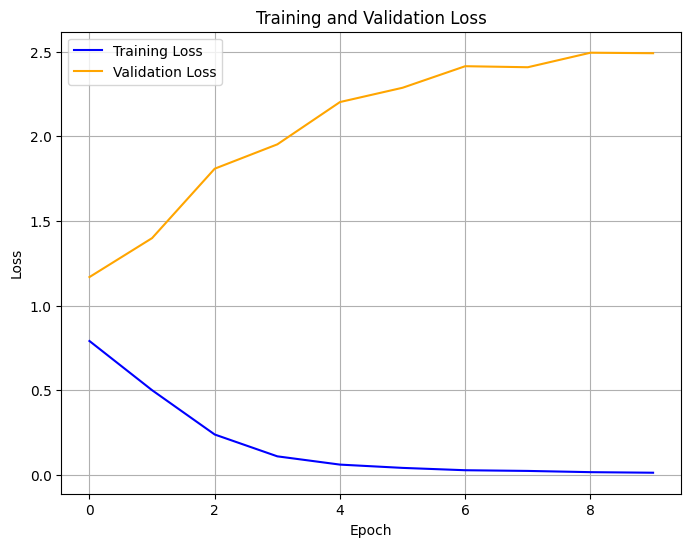

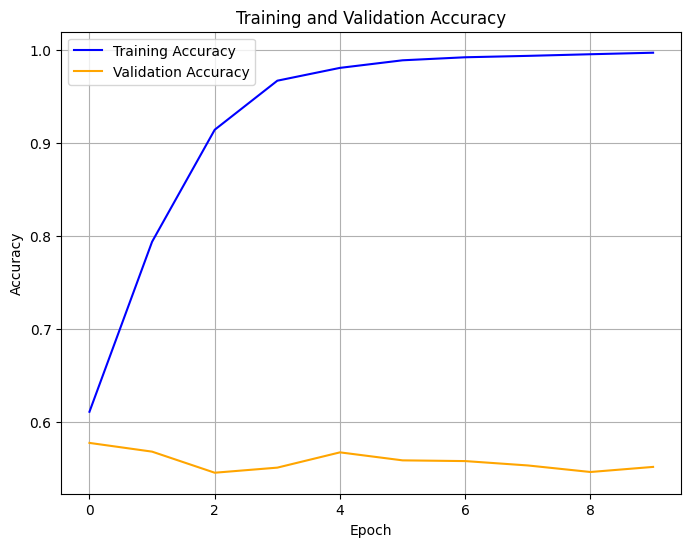

In [9]:
plot_training_validation_loss(train_losses, val_losses)
plot_training_validation_acc(train_accuracies, val_accuracies)

In [12]:
# model.save_pretrained("./params/bert-turtle-soup-classification-zh")
# tokenizer.save_pretrained("./params/bert-turtle-soup-classification-zh")

('./params/classification_model\\tokenizer_config.json',
 './params/classification_model\\special_tokens_map.json',
 './params/classification_model\\vocab.txt',
 './params/classification_model\\added_tokens.json',
 './params/classification_model\\tokenizer.json')